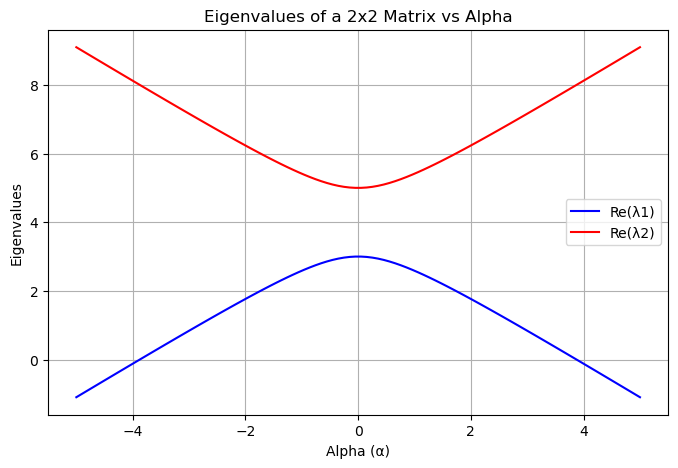

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the diagonal elements (positive numbers)
omega1 = 3  # Example positive number
omega2 = 5  # Example positive number

# Define the range of alpha values
alpha_values = np.linspace(-5, 5, 100)

eigenvalues_real = []
eigenvalues_imag = []

# Compute eigenvalues for each alpha
for alpha in alpha_values:
    matrix = np.array([[omega1, alpha], [alpha, omega2]])
    eigenvalues = np.linalg.eigvals(matrix)
    eigenvalues_real.append(eigenvalues.real)
    eigenvalues_imag.append(eigenvalues.imag)

eigenvalues_real = np.array(eigenvalues_real)
eigenvalues_imag = np.array(eigenvalues_imag)

# Plot the eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(alpha_values, eigenvalues_real[:, 0], label='Re(λ1)', color='b')
plt.plot(alpha_values, eigenvalues_real[:, 1], label='Re(λ2)', color='r')
plt.xlabel("Alpha (α)")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues of a 2x2 Matrix vs Alpha")
plt.legend()
plt.grid()
plt.show()


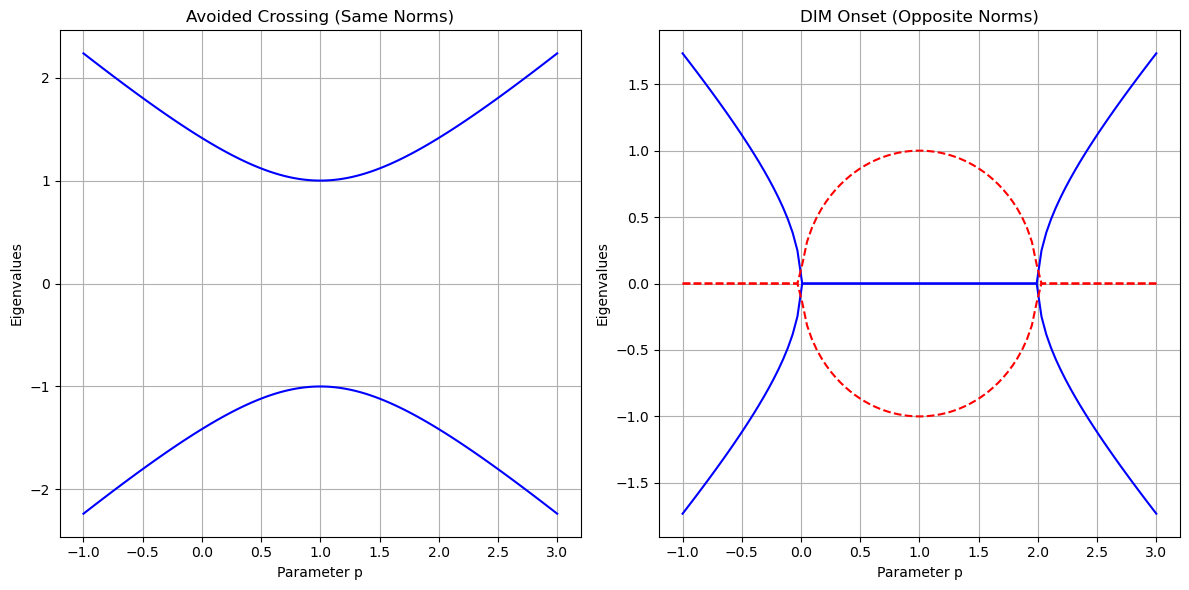

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for avoided crossing (same-sign norms)
omega1_ac = 1
omega2_ac = -1
ps = np.linspace(-1, 3, 100)
alpha = 1
eigenvalues_real_ac = []
eigenvalues_imag_ac = []

# Compute eigenvalues for avoided crossing
for p in ps:
    matrix = np.array([[omega1_ac-p, alpha], [alpha, omega2_ac+p]])
    eigenvalues = np.linalg.eigvals(matrix)
    eigenvalues_real_ac.append(np.sort(eigenvalues.real))
    eigenvalues_imag_ac.append(eigenvalues.imag)

eigenvalues_real_ac = np.array(eigenvalues_real_ac)
eigenvalues_imag_ac = np.array(eigenvalues_imag_ac)

# Define parameters for DIM onset (opposite-sign norms)
omega1_dim = 1
omega2_dim = -1

eigenvalues_real_dim = []
eigenvalues_imag_dim = []

# Compute eigenvalues for DIM onset
for p in ps:
    matrix = np.array([[omega1_dim - p, alpha], [-alpha, omega2_dim + p]])
    eigenvalues = np.linalg.eigvals(matrix)
    eigenvalues_real_dim.append(eigenvalues.real)
    eigenvalues_imag_dim.append(eigenvalues.imag)

eigenvalues_real_dim = np.array(eigenvalues_real_dim)
eigenvalues_imag_dim = np.array(eigenvalues_imag_dim)

# Plot combined figure
plt.figure(figsize=(12, 6))

# Avoided crossing plot
plt.subplot(1, 2, 1)
plt.plot(ps, eigenvalues_real_ac[:, 0], label='Re(λ1)', color='b')
plt.plot(ps, eigenvalues_real_ac[:, 1], label='Re(λ2)', color='b')
plt.title("Avoided Crossing (Same Norms)")
plt.xlabel("Parameter p")
plt.ylabel("Eigenvalues")
plt.grid(True)

# DIM onset plot
plt.subplot(1, 2, 2)
plt.plot(ps, eigenvalues_real_dim[:, 0], label='Re(λ1)', color='b')
plt.plot(ps, eigenvalues_real_dim[:, 1], label='Re(λ2)', color='b')
plt.plot(ps, eigenvalues_imag_dim[:, 0], label='Im(λ1)', color='r', linestyle='--')
plt.plot(ps, eigenvalues_imag_dim[:, 1], label='Im(λ2)', color='r', linestyle='--')
plt.title("DIM Onset (Opposite Norms)")
plt.xlabel("Parameter p")
plt.ylabel("Eigenvalues")
plt.grid(True)

plt.tight_layout()
plt.savefig("modemerging.png",dpi=300)
plt.show()


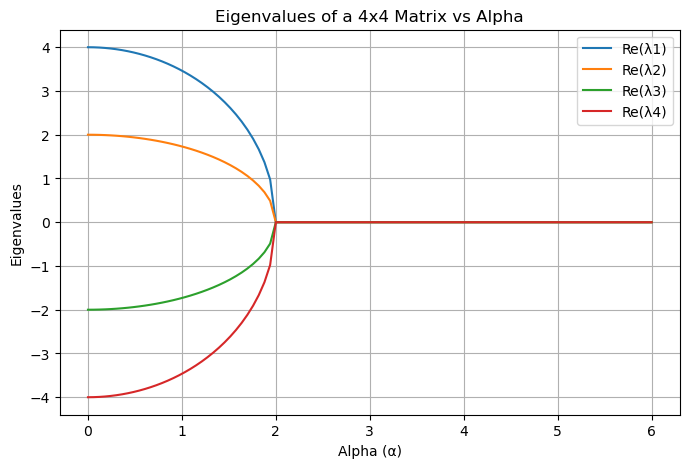

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the diagonal elements (positive numbers)
omega1 = 2  # Example positive number
omega2 = -2  # Example positive number
omega3 = 4  # New diagonal element
omega4 = -4 # New diagonal element

# Define the range of alpha values
alpha_values = np.linspace(0, 6, 100)

eigenvalues_real = []
eigenvalues_imag = []

# Compute eigenvalues for each alpha
for alpha in alpha_values:
    matrix = np.array([
        [omega1, alpha, 0, 0],
        [-alpha, omega2, 0, 0],
        [0, 0, omega3, 2*alpha],
        [0, 0, -2*alpha, omega4]
    ])
    eigenvalues = np.linalg.eigvals(matrix)
    eigenvalues = np.sort(eigenvalues)[::-1]
    eigenvalues_real.append(eigenvalues.real)
    eigenvalues_imag.append(eigenvalues.imag)
    
eigenvalues_real = np.array(eigenvalues_real)
eigenvalues_imag = np.array(eigenvalues_imag)

# Plot the eigenvalues
plt.figure(figsize=(8, 5))
for i in range(4):
    plt.plot(alpha_values, eigenvalues_real[:, i], label=f'Re(λ{i+1})')
    #plt.plot(alpha_values, eigenvalues_imag[:, i], label=f'Im(λ{i+1})')
plt.xlabel("Alpha (α)")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues of a 4x4 Matrix vs Alpha")
plt.legend()
plt.grid()
plt.show()


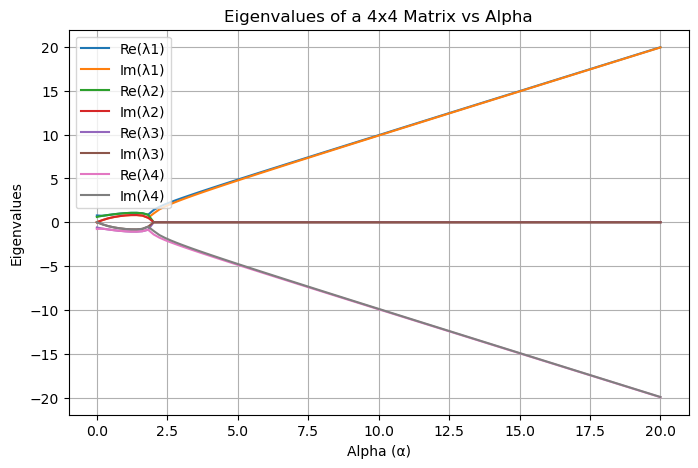

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Define the diagonal elements (positive numbers)
omega1 = 3  # Example positive number
omega2 = 1.2  # Example positive number
omega3 = 0.2  # New diagonal element
omega4 = 0.3  # New diagonal element

# Define the range of alpha values
alpha_values = np.linspace(0, 20, 100)

eigenvalues_real = []
eigenvalues_imag = []

# Compute eigenvalues for each alpha
for alpha in alpha_values:
    matrix = np.array([
        [omega1, alpha, 0, 0],
        [alpha, omega2, 0, 0],
        [0, 0, omega3, 1*alpha],
        [0, 0, -1*alpha, omega4]
    ])
    N = 2
    J = np.block([[np.zeros((N, N)), np.eye(N)], [-np.eye(N), np.zeros((N, N))]])
    
    matrix2 = -1j * J @ matrix
    eigenvalues = np.linalg.eigvals(matrix2)
    
    # Sort eigenvalues from largest to smallest
    eigenvalues = np.sort(eigenvalues)[::-1]
    
    eigenvalues_real.append(np.sort(eigenvalues.real)[::-1])
    eigenvalues_imag.append(np.sort(eigenvalues.imag)[::-1])

eigenvalues_real = np.array(eigenvalues_real)
eigenvalues_imag = np.array(eigenvalues_imag)

# Plot the eigenvalues
plt.figure(figsize=(8, 5))
for i in range(4):
    plt.plot(alpha_values, eigenvalues_real[:, i], label=f'Re(λ{i+1})')
    plt.plot(alpha_values, eigenvalues_imag[:, i], label=f'Im(λ{i+1})')
plt.xlabel("Alpha (α)")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues of a 4x4 Matrix vs Alpha")
plt.legend()
plt.grid()
plt.show()


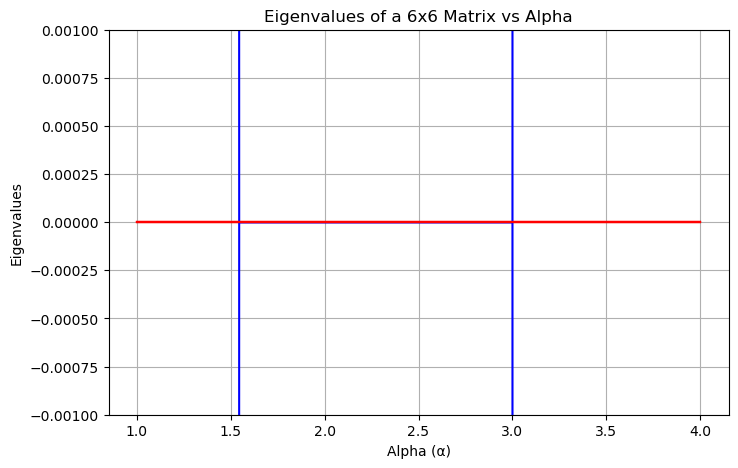

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the diagonal elements (positive numbers)
omega1 = 2  # Example positive number
omega2 = 1.2  # Example positive number
omega3 = 3  # New diagonal element
omega4 = 3  # New diagonal element
omega5 = 0.2  # New diagonal element
omega6 = 2 # New diagonal element
beta=0.3
# Define the range of alpha values
alpha_values = np.linspace(1,4, 100)

eigenvalues_real = []
eigenvalues_imag = []

# Compute eigenvalues for each alpha
for alpha in alpha_values:
    matrix = np.array([
        [omega1, alpha, 0, 0, 0, 0],
        [alpha, omega2, beta, 0, 0, 0],
        [0, beta, omega3, 0, 0, 0],
        [0, 0, 0, omega4 - alpha, 0, 0],
        [0, 0, 0, 0, omega5 + alpha, 0],
        [0, 0, 0, 0, 0, omega6 - beta]
    ])
    N = 3
    J = np.block([[np.zeros((N, N)), np.eye(N)], [-np.eye(N), np.zeros((N, N))]])
    
    matrix2 = -1j * J @ matrix
    eigenvalues = np.linalg.eigvals(matrix2)
    eigenvalues = np.sort(eigenvalues.real)[::-1]
    # Sort eigenvalues from largest to smallest
    eigenvalues_real.append(eigenvalues.real)
    eigenvalues_imag.append(eigenvalues.imag)

eigenvalues_real = np.array(eigenvalues_real)
eigenvalues_imag = np.array(eigenvalues_imag)

# Plot the eigenvalues
plt.figure(figsize=(8, 5))
for i in range(6):
    plt.plot(alpha_values, eigenvalues_real[:, i],color='b', label=f'Re(λ{i+1})')
    plt.plot(alpha_values, eigenvalues_imag[:, i],color='r' ,label=f'Im(λ{i+1})')
plt.xlabel("Alpha (α)")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues of a 6x6 Matrix vs Alpha")
plt.grid()
plt.ylim(-0.001,0.001)
plt.show()

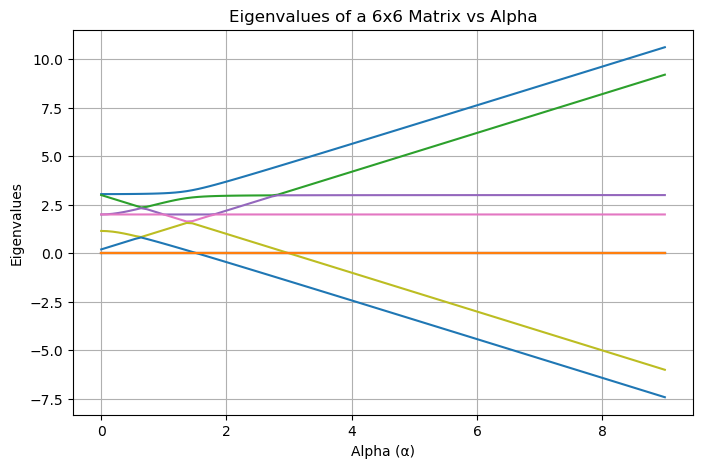

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Define the diagonal elements (positive numbers)
omega1 = 2  # Example positive number
omega2 = 1.2  # Example positive number
omega3 = 3  # New diagonal element
omega4 = 3  # New diagonal element
omega5 = 0.2  # New diagonal element
omega6 = 2 # New diagonal element
beta=0.3
# Define the range of alpha values
alpha_values = np.linspace(0, 9, 100)

eigenvalues_real = []
eigenvalues_imag = []

# Compute eigenvalues for each alpha
for alpha in alpha_values:
    matrix = np.array([
        [omega1, alpha, 0, 0, 0, 0],
        [alpha, omega2, beta, 0, 0, 0],
        [0, beta, omega3, 0, 0, 0],
        [0, 0, 0, omega4 - alpha, 0, 0],
        [0, 0, 0, 0, omega5 + alpha, 0],
        [0, 0, 0, 0, 0, omega6]
    ])
    N = 3
    J = np.block([[np.zeros((N, N)), np.eye(N)], [-np.eye(N), np.zeros((N, N))]])
    
    matrix2 = -1j * J @ matrix
    eigenvalues = np.linalg.eigvals(matrix)
    eigenvalues = np.sort(eigenvalues.real)[::-1]
    # Sort eigenvalues from largest to smallest
    eigenvalues_real.append(eigenvalues.real)
    eigenvalues_imag.append(eigenvalues.imag)

eigenvalues_real = np.array(eigenvalues_real)
eigenvalues_imag = np.array(eigenvalues_imag)

# Plot the eigenvalues
plt.figure(figsize=(8, 5))
for i in range(6):
    plt.plot(alpha_values, eigenvalues_real[:, i], label=f'Re(λ{i+1})')
    plt.plot(alpha_values, eigenvalues_imag[:, i], label=f'Im(λ{i+1})')
plt.xlabel("Alpha (α)")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues of a 6x6 Matrix vs Alpha")
plt.grid()
plt.show()

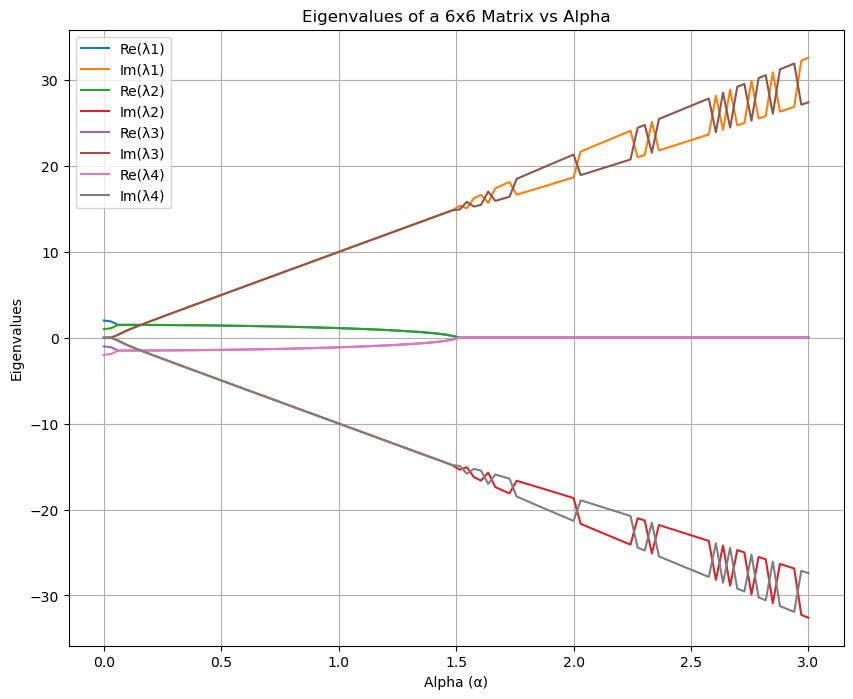

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the diagonal elements (positive numbers)
omega1 = 1  # Example positive number
omega2 = 2  # Example positive number # New diagonal element
beta = 2
gamma= 10
# Define the range of alpha values
alpha_values = np.linspace(0, 3, 100)
eigenvalues_real = []
eigenvalues_imag = []

# Compute eigenvalues for each alpha
for alpha in alpha_values:
    matrix = np.array([
        [omega1,alpha,gamma*alpha,0],
        [-alpha,-omega1,0,gamma*alpha],
        [-gamma*alpha,0,omega2,alpha],
        [0,-gamma*alpha,-alpha,-omega2]])

    
    eigenvalues = np.linalg.eigvals(matrix)
    eigenvalues = np.sort(eigenvalues)[::-1]
    # Sort eigenvalues from largest to smallest
    eigenvalues_real.append(eigenvalues.real)
    eigenvalues_imag.append(eigenvalues.imag)

eigenvalues_real = np.array(eigenvalues_real)
eigenvalues_imag = np.array(eigenvalues_imag)

# Plot the eigenvalues
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.plot(alpha_values, eigenvalues_real[:, i], label=f'Re(λ{i+1})')
    plt.plot(alpha_values, eigenvalues_imag[:, i], label=f'Im(λ{i+1})')
plt.xlabel("Alpha (α)")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues of a 6x6 Matrix vs Alpha")
plt.grid()
plt.legend()
plt.show()